Lien github du projet : [Github](https://github.com/QuentinNav/Clustering-de-produits-alimentaires "Clustering de produits alimentaires")

Avant d'exécuter le code il faut renseigner les chemins d'accès aux datasets et modèles dans le fichier config.py.

# Import du drive contenant le dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import des librairies et fonctions nécessaires

In [ ]:
from preprocessing import *
from config import data_path

# Chargement du dataset

In [ ]:
df = pd.read_csv(data_path+"data_reduced.csv", sep="\t", low_memory=False)
print("Shape du dataset : ",df.shape)
df.head()

Shape du dataset :  (2625589, 8)


,product_name,brands,categories_en,ingredients_text,ingredients_tags,food_groups_en,main_category_en,image_url
0,jeunes pousses,endives,NaN,NaN,NaN,NaN,NaN,NaN
1,Andrè,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,L.casei,NaN,NaN,"Leche semidesnatada, azucar 6.9%, leche desnat...","en:semi-skimmed-milk,en:dairy,en:milk,en:sugar...",NaN,NaN,https://images.openfoodfacts.org/images/produc...
3,Skyr,Danone,"Dairies,Desserts,Fermented foods,Fermented mil...",NaN,NaN,"Milk and dairy products,Dairy desserts",Cream cheeses,https://images.openfoodfacts.org/images/produc...
4,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...


# Exploration des données

In [ ]:
check_nan(df)

Valeurs nan dans product_name : 93231
Valeurs nan dans brands : 1337721
Valeurs nan dans categories_en : 1537615
Valeurs nan dans ingredients_text : 1827462
Valeurs nan dans ingredients_tags : 1829055
Valeurs nan dans food_groups_en : 1746150
Valeurs nan dans main_category_en : 1537615
Valeurs nan dans image_url : 511421


Pour 93231 lignes les noms de produits ne sont pas renseignés

In [ ]:
check_unique(df)

Valeurs uniques dans product_name : 1595035
Valeurs uniques dans brands : 220324
Valeurs uniques dans categories_en : 93977
Valeurs uniques dans ingredients_text : 677599
Valeurs uniques dans ingredients_tags : 599501
Valeurs uniques dans food_groups_en : 46
Valeurs uniques dans main_category_en : 39222
Valeurs uniques dans image_url : 2113998


In [ ]:
df[(df["ingredients_text"].isna()) & (~df["ingredients_tags"].isna())]

,product_name,brands,categories_en,ingredients_text,ingredients_tags,food_groups_en,main_category_en,image_url
2672,Vegan 3K-Protein,Nutrition-Plus Germany,"Dietary supplements,Vitamins",NaN,"en:sunflower-oil,en:oil-and-fat,en:vegetable-o...",NaN,Vitamins,https://images.openfoodfacts.org/images/produc...
90134,Carrotes Coupées,Bolthouse Farms,"Plant-based foods and beverages,Plant-based fo...",NaN,"en:baby-carrots,en:vegetable,en:root-vegetable...","Fruits and vegetables,Vegetables",Fresh vegetables,https://images.openfoodfacts.org/images/produc...
91067,Onion Powder,Badia,"Plant-based foods and beverages,Plant-based fo...",NaN,"en:onion-powder-cebolla-en-polvo-gluten-free,e...","Fruits and vegetables,Vegetables",Onion powder,https://images.openfoodfacts.org/images/produc...
91096,Garlic & Parsley,Badia,"Plant-based foods and beverages,Plant-based fo...",NaN,en:www-a-packet-ia-ingradientle,"Fruits and vegetables,Vegetables",Spice Mix,NaN
91186,Ground Ginger,Badia,"Plant-based foods and beverages,Plant-based fo...",NaN,en:xxxx-кни-xxxx,NaN,Ginger powder,https://images.openfoodfacts.org/images/produc...
...,...,...,...,...,...,...,...,...
2569276,Billa Orange 100%,Billa,"Plant-based foods and beverages,Beverages,Plan...",NaN,fr:концентрат-от-портокалов-сок,"Beverages,Fruit juices",Concentrated orange juices,https://images.openfoodfacts.org/images/produc...
2581581,crackers,Coles,"Snacks,Salty snacks,Appetizers,Crackers",NaN,"en:wheat-flour,en:cereal,en:flour,en:wheat,en:...","Salty snacks,Appetizers",Crackers,https://images.openfoodfacts.org/images/produc...
2604014,NaN,deliciou,"Plant-based foods and beverages,Plant-based fo...",NaN,"en:maltodextrins,en:salt,en:yeast,en:yeast-ext...",NaN,Groceries,NaN
2613838,แคมป์เบลลี,"Campbelli,แคมป์เบลลี","Meals,Dried products,Dried products to be rehy...",NaN,"th:ingredients-creamer,th:potato-starch,th:che...","Composite foods,One-dish meals",Dehydrated soups,https://images.openfoodfacts.org/images/produc...


Nous pouvons voir que pour certaines lignes les ingrédients ne sont pas renseignés dans la colonnes ingredients_text mais le sont dans ingredients_tags. Vu que cela ne représente que 240 lignes nous pouvons les ignorer. 

In [ ]:
df[(~df["ingredients_text"].isna()) & (df["ingredients_tags"].isna())]

,product_name,brands,categories_en,ingredients_text,ingredients_tags,food_groups_en,main_category_en,image_url
5533,London Porter,Fuller's,"Beverages,Alcoholic beverages,Beers,Black beer...",Contient du _gluten_.,NaN,Alcoholic beverages,fr:porter,https://images.openfoodfacts.org/images/produc...
8758,Ready to bake traditional -inch pie crusts count,The Kroger Co.,"Plant-based foods and beverages,Plant-based fo...",contains: wheat.,NaN,Cereals and potatoes,Cereals and potatoes,https://images.openfoodfacts.org/images/produc...
21514,American Wild Shrimp,Kingston Marketing Co,"Seafood,Frozen foods,Crustaceans,Frozen seafoo...",Contains: shrimp,NaN,"Fish‚ Meat‚ Eggs,Fish and seafood",Shrimps,NaN
29126,Odwalla Protein Shake Vanilla,NaN,NaN,what's inside? 32g protein Bs 1800 DV vitamin ...,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...
41438,Filled crescents,Pillsbury,NaN,enriched flour bleached wheat flour niacin fer...,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...
...,...,...,...,...,...,...,...,...
2607168,Crushed Apple Cider,Monteiths Brewing Co,Apple-cider,CONTAINS SULPHITES,NaN,NaN,Apple-cider,https://images.openfoodfacts.org/images/produc...
2608263,Corn chips,NaN,NaN,contains milk,NaN,NaN,NaN,NaN
2612377,Boisson alimentaire à la chlorophylle,SPLINA,"Plant-based foods and beverages,Vegetable-base...",Energy Calories Total Fat Matieres grasses Car...,NaN,NaN,Vegetable-based foods and beverages,https://images.openfoodfacts.org/images/produc...
2613669,NaN,yellow coulor,"Snacks,Sweet snacks,Biscuits and cakes,Biscuits",.,NaN,"Sugary snacks,Biscuits and cakes",Biscuits,NaN


Il y a 1833 lignes pour lesquelles les ingredients sont renseignés sans leurs tags

## Nombre d'ingrédients_text uniques 

In [ ]:
df_temp = df.copy(deep=True)
df_temp["ingredients_text"]= df_temp["ingredients_text"].astype(str)
df_temp["ingredients_text_list"]= df_temp["ingredients_text"].apply(lambda x : x.replace(".","").split(","))
df_temp= df_temp.explode(["ingredients_text_list"])
df_temp.head()

,product_name,brands,categories_en,ingredients_text,ingredients_tags,food_groups_en,main_category_en,image_url,ingredients_text_list
0,jeunes pousses,endives,NaN,nan,NaN,NaN,NaN,NaN,nan
1,Andrè,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan
2,L.casei,NaN,NaN,"Leche semidesnatada, azucar 6.9%, leche desnat...","en:semi-skimmed-milk,en:dairy,en:milk,en:sugar...",NaN,NaN,https://images.openfoodfacts.org/images/produc...,Leche semidesnatada
2,L.casei,NaN,NaN,"Leche semidesnatada, azucar 6.9%, leche desnat...","en:semi-skimmed-milk,en:dairy,en:milk,en:sugar...",NaN,NaN,https://images.openfoodfacts.org/images/produc...,azucar 69%
2,L.casei,NaN,NaN,"Leche semidesnatada, azucar 6.9%, leche desnat...","en:semi-skimmed-milk,en:dairy,en:milk,en:sugar...",NaN,NaN,https://images.openfoodfacts.org/images/produc...,leche desnatada en polva


In [ ]:
print("Nombre d'ingrédients uniques : ",df_temp["ingredients_text_list"].nunique())

Nombre d'ingrédients uniques :  1903287


In [ ]:
df_temp["ingredients_text_list"].unique()

array(['nan', 'Leche semidesnatada', ' azucar 69%', ...,
       ' MAGERMLCHPULVER', 'VIANDE HACHEE PUR BOEUF 5% M',
       ' POURCENTAGE DE MATIERE GRASSE INFERIEUR A 5% RAPPORT COLLAGENE/PROTEINE VIANDE INFERIEUR A 12% VIANDE HACHEE DE BOEUF(*)'],
      dtype=object)

Les ingredients dans cette colonnes ne semblent pas suivre de format normalisé

## Observations sur les tags d'ingrédients :

In [ ]:
df["ingredients_tags"].unique()

array([nan,
       'en:semi-skimmed-milk,en:dairy,en:milk,en:sugar,en:added-sugar,en:disaccharide,es:leche-desnatada-en-polva,en:lactic-ferments,en:ferment,en:microbial-culture,en:vitamins,en:vitamin-b6,en:vitamin-d,es:contiene-lactobacidus-casei',
       'en:beta-alanine,en:creatine-hcl,en:ancient-peat-and-apple-extract,en:l-leucine,en:l-isoleucine,en:l-valine,en:betaine-anhydrous,en:arginine-silicate-inositol,en:cordyceps-militaris,en:ganoderma-lucidum,en:pleurotus-eryngii,en:shiitake,en:mushroom,en:hericium-erinaceus,en:and-trametes-veriscolor,en:phyllanthus-emblica,en:extract,en:nattokinase,en:1000-fu,en:of-enzyme-activity,en:aframomum-melegueta,en:caffeine-anhydrous,en:methyliberine,en:theacrine,en:e330,en:natural-and-artificial-flavouring,en:flavouring,en:natural-flavouring,en:artificial-flavouring,en:e296,en:soluble-corn-fiber,en:cereal,en:corn,en:corn-fiber,en:e955,en:e950,en:e552,en:e551,en:fd-c-blue-lake-1,en:as-elevatp,en:as-nitrosigine,en:cordyceps,en:reishi,en:king-trumpet

Pour les tags des ingrédients: 
* La langue semble être précisée avant chaque ingrédient dans le format "en:"
* Il peut y avoir plusieurs langues pour les ingrédients d'un seul produit
* Il semblerait que les ingrédients peuvent apparaîtrent plusieurs fois dans des langues différents

In [ ]:
df_temp= df.copy(deep=True)
df_temp=df_temp[~df_temp["ingredients_tags"].isna()]
df_temp["ingredients_tags"]=df_temp["ingredients_tags"].astype(str)
df_temp["ingredients_tags"]=df_temp["ingredients_tags"].apply(format_tags)
df_temp["ingredients_tags_keys"]=df_temp["ingredients_tags"].apply(lambda x :x.keys())

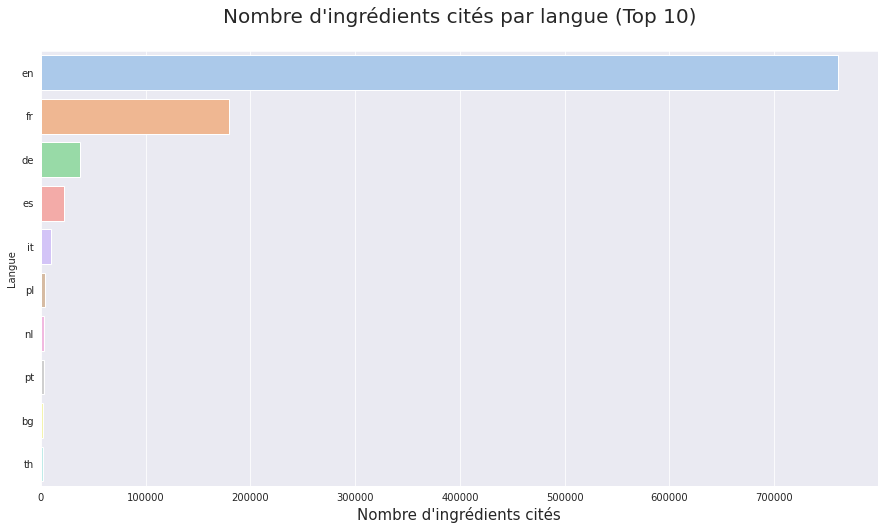

In [ ]:
sns.barplot(data=df_temp.explode(["ingredients_tags_keys"]).groupby("ingredients_tags_keys").agg("count").sort_values("ingredients_tags",ascending=False).reset_index()[["ingredients_tags_keys","ingredients_tags"]].iloc[:10],
            y="ingredients_tags_keys",
            x="ingredients_tags")

plt.xlabel("Nombre d'ingrédients cités",fontsize=15)
plt.ylabel("Langue")
plt.title("Nombre d'ingrédients cités par langue (Top 10)\n", fontsize=20)
plt.show()


Vu l'écrasante majorité d'ingrédients cités en anglais, nous décidons de ne garder que ceux là. 

In [ ]:
df_temp=df_temp[["en" in df_temp["ingredients_tags"].iloc[i] for i in range(len(df_temp))]]#Filtre sur les produits avec au moins un ingrédient en anglais 
df_temp["liste_ingredients"]= df_temp["ingredients_tags"].apply(lambda x : x["en"])
df_temp2=df_temp.explode(["liste_ingredients"]).groupby("liste_ingredients").agg("count").reset_index()[["liste_ingredients","ingredients_tags"]].sort_values("ingredients_tags",ascending=False)


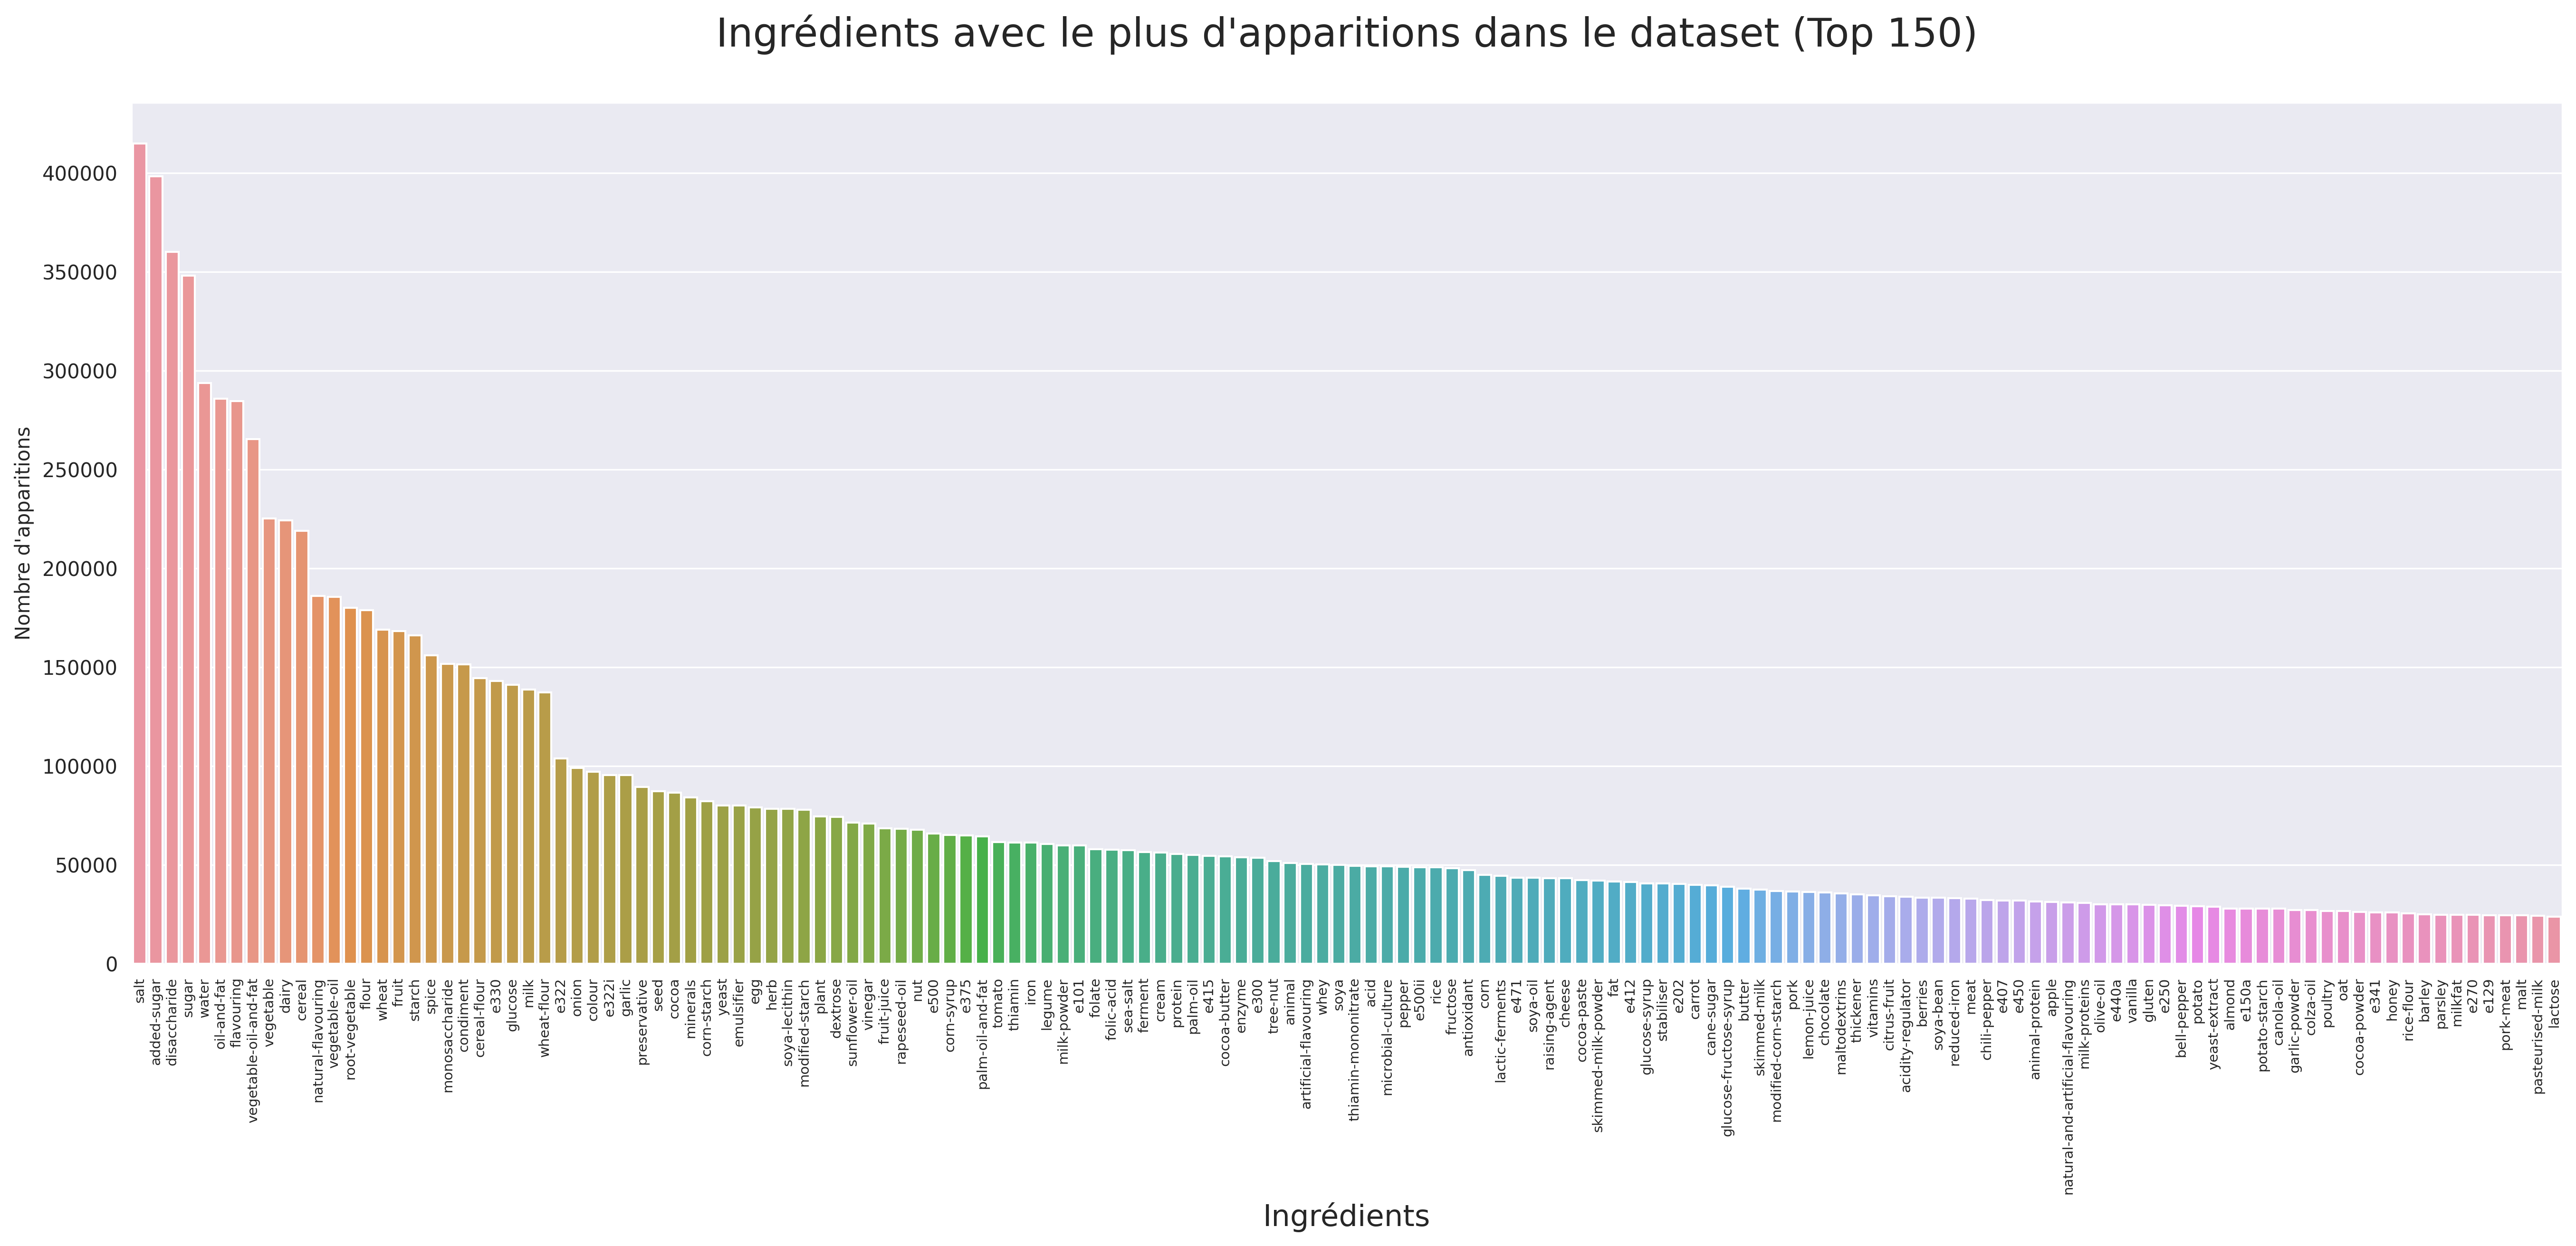

In [ ]:
plt.figure(figsize=(22,8))
plt.gcf().set_dpi(300)
sns.barplot(data=df_temp2.iloc[:150],
            x="liste_ingredients",
            y="ingredients_tags")

plt.xticks(rotation=90,fontsize=7)
plt.xlabel("Ingrédients",fontsize=15)
plt.ylabel("Nombre d'apparitions")
plt.title("Ingrédients avec le plus d'apparitions dans le dataset (Top 150)\n", fontsize=20)
plt.show()

In [ ]:
df_temp2["Somme_cummulee"] = df_temp2["ingredients_tags"].cumsum() 
df_temp2["Part_cummulee"] = df_temp2["Somme_cummulee"]/df_temp2["ingredients_tags"].sum()
df_temp2=df_temp2.reset_index().drop(columns=["index"])
df_temp2["Classement"] = df_temp2.index+1
df_temp2.head()

,liste_ingredients,ingredients_tags,Somme_cummulee,Part_cummulee,Classement
0,salt,414810,414810,0.023470,1
1,added-sugar,398294,813104,0.046005,2
2,disaccharide,360058,1173162,0.066377,3
3,sugar,348082,1521244,0.086072,4
4,water,293598,1814842,0.102683,5


## Part des ingrédients en fonction du nombre d'ingrédients gardé

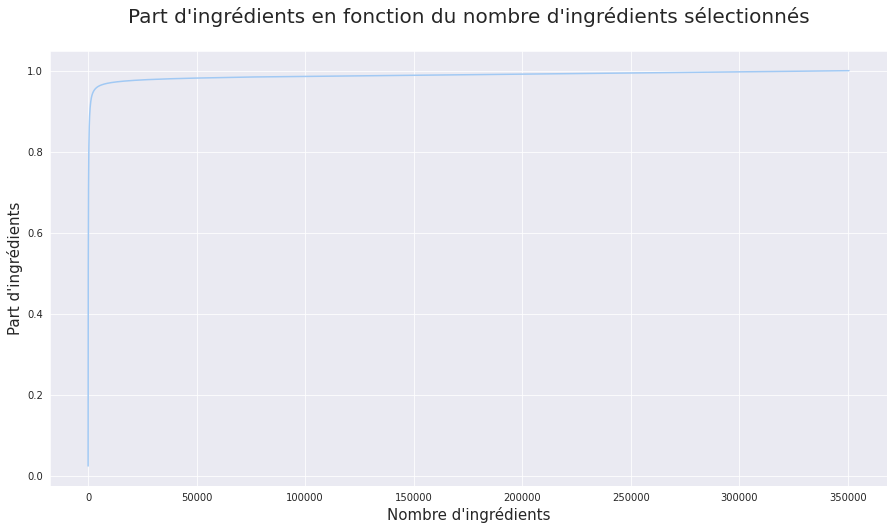

In [ ]:
sns.lineplot(data=df_temp2,x="Classement",y="Part_cummulee")
plt.xlabel("Nombre d'ingrédients",fontsize=15)
plt.ylabel("Part d'ingrédients",fontsize=15)
plt.title("Part d'ingrédients en fonction du nombre d'ingrédients sélectionnés\n",fontsize=20)
plt.show()

* On observe qu'un très petit nombre d'ingrédients différents représente une grande majorité des ingrédients apparaîssants dans les produits.
* Beaucoup d'ingrédients apparaissent très peu de fois, cela peut être dû à des fautes de frappes 

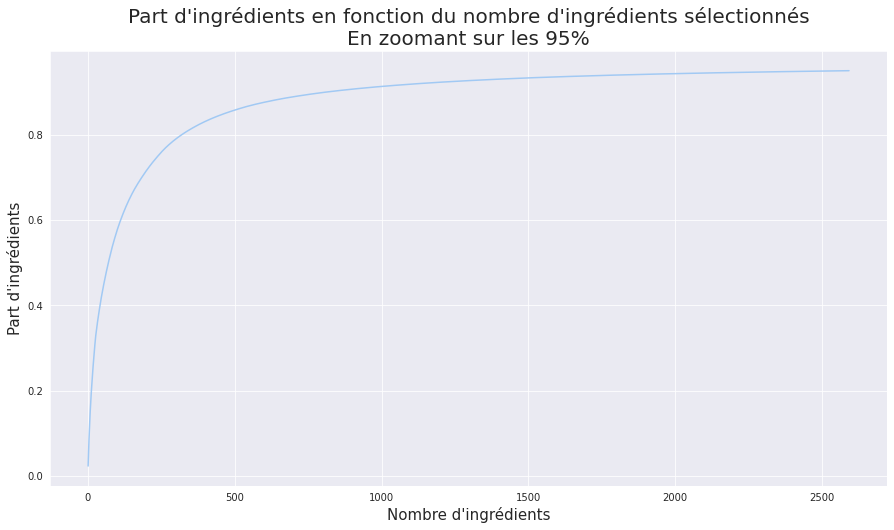

In [ ]:
sns.lineplot(data=df_temp2[df_temp2["Part_cummulee"]<0.95],x="Classement",y="Part_cummulee")
plt.xlabel("Nombre d'ingrédients",fontsize=15)
plt.ylabel("Part d'ingrédients",fontsize=15)
plt.title("Part d'ingrédients en fonction du nombre d'ingrédients sélectionnés\nEn zoomant sur les 95%",fontsize=20)
plt.show()

In [ ]:
df_temp2[df_temp2["Part_cummulee"]<=0.90].tail()

,liste_ingredients,ingredients_tags,Somme_cummulee,Part_cummulee,Classement
807,pork-by-product,1519,15899323,0.899579,808
808,horseradish,1518,15900841,0.899665,809
809,thiamine,1513,15902354,0.899750,810
810,oleoresin-paprika,1507,15903861,0.899836,811
811,e1103,1506,15905367,0.899921,812


* En sélectionnant environ 800 ingrédients on arrive à couvrir 90% des ingrédients utilisés.
* Ils apparaîssent tous au moins 1500 fois, nous pouvons donc supposer qu'ils sont bien orthographiés.  


## Modifications à apporter au dataset pour réaliser le word2vec :
* On ne garde que les colonnes product_name et ingredients_tags
* Drop des valeurs Nan dans la colonne ingredients_tags
* On ne garde que les ingrédients écrits en anglais dans ingredients_tags
* On ne garde que les ingrédients qui représentent 90% du total des ingrédients

# Nettoyage des données 

Pour la suite du projet nous décidons de ne garder que les colonnes Product_name et ingredients_tags 

## Import des librairies et des fonctions :

In [ ]:
from preprocessing import *
from config import data_path

## Chargement des données

In [ ]:
data = pd.read_csv(data_path+"data_reduced.csv", sep="\t", low_memory=False)

df=data[["product_name","ingredients_tags"]].dropna(subset=["ingredients_tags"])

df["product_name"]= df["product_name"].astype(str)
df["ingredients_tags"]= df["ingredients_tags"].astype(str)
df["ingredients_tags"]=df["ingredients_tags"].apply(format_tags)#Change le format de la colonne ingredients_tags 
df=df[["en" in df["ingredients_tags"].iloc[i] for i in range(len(df))]]#Filtre sur les produits avec au moins un ingrédient en anglais 
df["liste_ingredients"]= df["ingredients_tags"].apply(lambda x : x["en"])

df.head()

,product_name,ingredients_tags,liste_ingredients
2,L.casei,"{'es': [None, None, None, None, None, None, 'l...","[semi-skimmed-milk, dairy, milk, sugar, added-..."
9,hyde icon,"{'en': ['beta-alanine', 'creatine-hcl', 'ancie...","[beta-alanine, creatine-hcl, ancient-peat-and-..."
28,Solène céréales poulet,"{'en': ['antioxidant', 'colour', 'tomato', 've...","[antioxidant, colour, tomato, vegetable, mayon..."
36,Crème dessert chocolat,"{'en': ['whole-milk', 'dairy', 'milk', 'sugar'...","[whole-milk, dairy, milk, sugar, added-sugar, ..."
45,Baguette Poitevin,"{'fr': ['baguette-poite-vin-pain-baguette', No...","[None, water, salt, yeast, gluten, None, deact..."


### Génération de la liste des ingrédients que l'on garde 

In [ ]:
df_temp=df.explode(["liste_ingredients"]).groupby("liste_ingredients").agg("count").reset_index()[["liste_ingredients","ingredients_tags"]].sort_values("ingredients_tags",ascending=False)
df_temp["Somme_cummulee"] = df_temp["ingredients_tags"].cumsum() 
df_temp["Part_cummulee"] = df_temp["Somme_cummulee"]/df_temp["ingredients_tags"].sum()
ingredients_to_keep=df_temp.loc[df_temp["Part_cummulee"]<0.90, "liste_ingredients"].tolist()

In [ ]:
df_temp[df_temp["Part_cummulee"]<0.90]

,liste_ingredients,ingredients_tags,Somme_cummulee,Part_cummulee
271025,salt,414810,414810,0.023470
23715,added-sugar,398294,813104,0.046005
107652,disaccharide,360058,1173162,0.066377
299417,sugar,348082,1521244,0.086072
330406,water,293598,1814842,0.102683
...,...,...,...,...
245782,pork-by-product,1519,15899323,0.899579
157719,horseradish,1518,15900841,0.899665
309999,thiamine,1513,15902354,0.899750
224535,oleoresin-paprika,1507,15903861,0.899836


### On filtre le dataframe sur la liste d'ingrédients

In [ ]:
df["nombre_ingredients_pre_filtre"] = df["liste_ingredients"].apply(lambda x :len(x))

df["liste_ingredients"]=df["liste_ingredients"].apply(lambda liste_ingredients : filter_ingredients(liste_ingredients, ingredients_to_keep))# Filtre des ingrédients

df["nombre_ingredients"] = df["liste_ingredients"].apply(lambda x :len(x)) 
df["nombre_ingredients_perdus"] = df["nombre_ingredients_pre_filtre"]- df["nombre_ingredients"]
df["part_ingredients_perdus"] = df["nombre_ingredients_perdus"]/ df["nombre_ingredients_pre_filtre"]

df.head()

,product_name,ingredients_tags,liste_ingredients,nombre_ingredients_pre_filtre,nombre_ingredients,nombre_ingredients_perdus,part_ingredients_perdus
2,L.casei,"{'es': [None, None, None, None, None, None, 'l...","[semi-skimmed-milk, dairy, milk, sugar, added-...",14,12,2,0.142857
9,hyde icon,"{'en': ['beta-alanine', 'creatine-hcl', 'ancie...","[shiitake, mushroom, extract, e330, natural-an...",56,15,41,0.732143
28,Solène céréales poulet,"{'en': ['antioxidant', 'colour', 'tomato', 've...","[antioxidant, colour, tomato, vegetable, mayon...",32,32,0,0.000000
36,Crème dessert chocolat,"{'en': ['whole-milk', 'dairy', 'milk', 'sugar'...","[whole-milk, dairy, milk, sugar, added-sugar, ...",10,10,0,0.000000
45,Baguette Poitevin,"{'fr': ['baguette-poite-vin-pain-baguette', No...","[water, salt, yeast, gluten, e300, wheat-flour...",23,14,9,0.391304


In [ ]:
#On vérifie que le filtre à fonctionné
print("Nombre d'ingrédients uniques restants : ",df.explode(["liste_ingredients"])["liste_ingredients"].nunique())

Nombre d'ingrédients uniques restants :  812


### Nombre d'ingrédients par produit avant de filtrer :

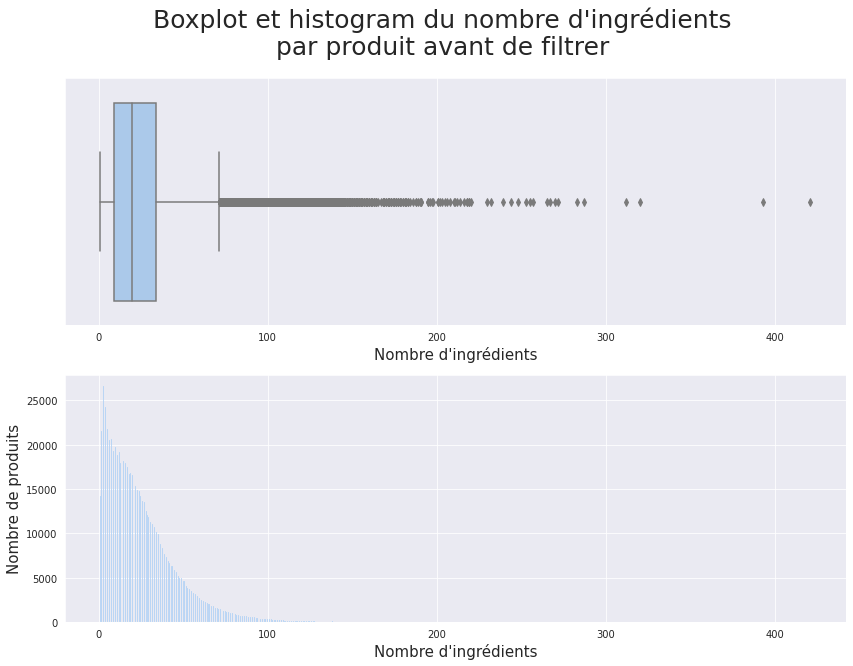

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(14,10))

#Nombre d'ingrédients maximum pour un seul produit : 
ax=axes[0]

sns.boxplot(data= df, x="nombre_ingredients_pre_filtre", ax=ax)
ax.set_xlabel("Nombre d'ingrédients", fontsize=15)
#ax.set_title("Boxplot du nombre d'ingrédients par produit\n", fontsize=25)


ax=axes[1]
sns.histplot(data=df, x="nombre_ingredients_pre_filtre",ax=ax)
#ax.set_title("Histogramme du nombre d'ingrédients par produit\n", fontsize=25)
ax.set_xlabel("Nombre d'ingrédients",fontsize=15)
ax.set_ylabel("Nombre de produits", fontsize=15)

#plt.tight_layout()
plt.suptitle("Boxplot et histogram du nombre d'ingrédients\npar produit avant de filtrer", fontsize=25)
plt.show()

In [ ]:
print("Nombre de produits avec 0 ingrédients avant le filtre:", df[df["nombre_ingredients_pre_filtre"]==0].count()["liste_ingredients"])

Nombre de produits avec 0 ingrédients avant le filtre: 0


### Nombre d'ingrédients par produit après le filtre 

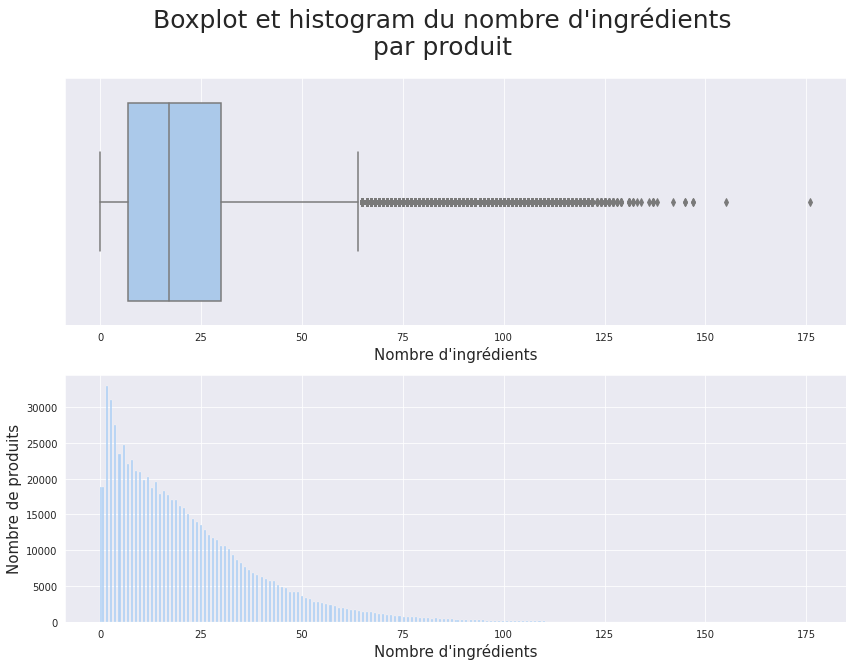

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(14,10))

#Nombre d'ingrédients maximum pour un seul produit : 
ax=axes[0]
sns.boxplot(data= df, x="nombre_ingredients", ax=ax)
ax.set_xlabel("Nombre d'ingrédients", fontsize=15)
#ax.set_title("Boxplot du nombre d'ingrédients par produit\n", fontsize=25)

ax=axes[1]
sns.histplot(data=df, x="nombre_ingredients",ax=ax)
#ax.set_title("Histogramme du nombre d'ingrédients par produit\n", fontsize=25)
ax.set_xlabel("Nombre d'ingrédients",fontsize=15)
ax.set_ylabel("Nombre de produits", fontsize=15)

#plt.tight_layout()
plt.suptitle("Boxplot et histogram du nombre d'ingrédients\npar produit", fontsize=25)
plt.show()

Le fait de filtrer pour ne garder que les ingrédients les plus récurrents à laisser dans le dataset des produits sans ingrédients.

### Observation des produits ayant perdus beaucoup d'ingrédients

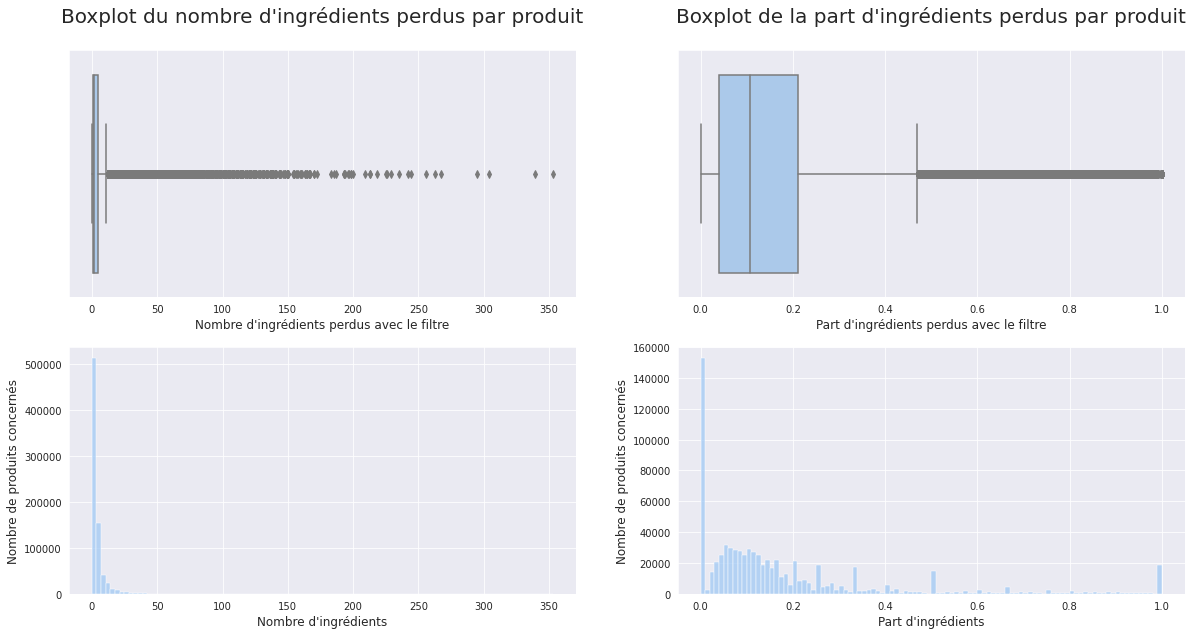

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(20,10))

#Nombre d'ingrédients maximum pour un seul produit : 
ax=axes[0,0]
sns.boxplot(data= df, x="nombre_ingredients_perdus", ax=ax)
ax.set_xlabel("Nombre d'ingrédients perdus avec le filtre", fontsize=12)
ax.set_title("Boxplot du nombre d'ingrédients perdus par produit\n", fontsize=20)


ax=axes[0,1]
sns.boxplot(data= df, x="part_ingredients_perdus", ax=ax)
ax.set_xlabel("Part d'ingrédients perdus avec le filtre", fontsize=12)
ax.set_title("Boxplot de la part d'ingrédients perdus par produit\n", fontsize=20)

ax=axes[1,0]
sns.histplot(data=df, x="nombre_ingredients_perdus",ax=ax, bins=100)
#ax.set_title("Histogramme du nombre d'ingrédients par produit\n", fontsize=25)
ax.set_xlabel("Nombre d'ingrédients",fontsize=12)
ax.set_ylabel("Nombre de produits concernés", fontsize=12)

ax=axes[1,1]
sns.histplot(data=df, x="part_ingredients_perdus",ax=ax, bins=100)
#ax.set_title("Histogramme du nombre d'ingrédients par produit\n", fontsize=25)
ax.set_xlabel("Part d'ingrédients",fontsize=12)
ax.set_ylabel("Nombre de produits concernés", fontsize=12)

#plt.tight_layout()
#plt.suptitle("Boxplot et histogram du nombre d'ingrédients\npar produit", fontsize=25)
plt.show()

In [ ]:
print("Nombre de produits ayant perdu plus de 50% de leurs ingrédients : ", df.loc[df["part_ingredients_perdus"]>0.5,"ingredients_tags"].count())
print("Nombre de produits avec 0 ingrédients après le filtre:", df[df["nombre_ingredients"]==0].count()["liste_ingredients"])
print("Nombre de produits avec 1 ingrédients après le filtre:", df[df["nombre_ingredients"]==1].count()["liste_ingredients"])

Nombre de produits ayant perdu plus de 50% de leurs ingrédients :  59754
Nombre de produits avec 0 ingrédients après le filtre: 18821
Nombre de produits avec 1 ingrédients après le filtre: 18776


Nous décidons de retirer les produits ayant 0 et 1 ingrédients ainsi que ceux qui ont perdu plus de 50% de leurs ingrédients.

In [ ]:
df_size_bf= len(df)
df=df[(df["part_ingredients_perdus"]<=0.5) & (df["nombre_ingredients"]!=0) & (df["nombre_ingredients"]!=1)]
print("Nous avons retiré "+str(df_size_bf - len(df))+" produits sur "+str(df_size_bf)+", il nous en reste donc "+str(len(df))+".")

Nous avons retiré 69123 produits sur 760860, il nous en reste donc 691737.


In [ ]:
#Saving the final dataframe : 
df.to_csv(data_path+"cleaned_data.csv", sep="\t", index=False)